# 2HDM-General

## Higgs couplings with fermions
In the most general context to 2HDM, the couplings $g_{hff}$ can be extracted of:

$$\mathcal{L}_Y^{hqq} = \frac{g}{2}\left(\frac{m_{d_{m}}}{m_{W}}\right) d_{m}\left[-\frac{\operatorname{sen} \alpha}{\cos \beta} \delta_{m n}+\frac{\sqrt{2} \cos (\alpha-\beta)}{g \cos \beta}\left(\frac{m_{W}}{m_{d_{m}}}\right)\left(\tilde{Y}_{2}^{d}\right)_{m n}\right] d_{n} h^{0}$$
$$+\frac{g}{2}\left(\frac{m_{u_{m}}}{m_{W}}\right) \bar{u}_{m}\left[\frac{\cos \alpha}{\operatorname{sen} \beta} \delta_{m n}-\frac{\sqrt{2} \cos (\alpha-\beta)}{g \operatorname{sen} \beta}\left(\frac{m_{W}}{m_{u_{m}}}\right)\left(\bar{Y}_{1}^{u}\right)_{m n}\right] u_{n} h^{0}$$

where $f$ represents fermions, $m_f$ and $m_W$ are the masses of $f$ and $W$ respectively, $\alpha$ and $\beta$ are the mixing angles of 2HDM-I and finally $g$ is the $SU(2)$ coupling constant. Y de note Yukawa couplings which can be rewritten using Cheng and Sher anzats, de tal forma que 

$$\left(Y_{1}^{f}\right)_{i j} = \frac{\sqrt{m^f_i m^f_j}}{v}A_{ij}^f$$

In the case of $W$ and $Z$ Higgs couplings we have the next expressions:

$$g_{hVV} = g_V m_{V}\sin{(\alpha-\beta)}$$
where $m_V$ with $V = Z, W$. If we consider $C_{\alpha \beta} = \cos{(\alpha-\beta)}$

$$\alpha = \arctan{(\tan{(\beta)})} + \arccos{(C_{\alpha \beta})}$$
$$\sin{(\beta)} = \tan{(\beta)}\cos{(\arctan{(\tan{(\beta)})})}$$
then, $g_{hff}$ and $g_{hVV}$ are rewritten in term of $t_{\beta} = \tan{(\beta)}$ and $C_{\alpha \beta}$.

In python these couplings can be defined as functions $\alpha$, $\tan{\beta}$ and $C_{\alpha \beta} = \cos{(\alpha - \beta)}$. 

In [44]:
from sympy import * #import sympy
init_printing()

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from spacemathpy import *

### Python definition of $g_{hff}$

In [45]:
a,att,cab,tb = symbols('alpha,A_{tt},C_{ab},t_b',real=True)

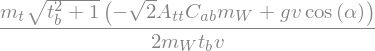

In [46]:
#2HDM-III
s = 'symbol'
ghtt = (g[s]/2)*(mt[s]/mW[s])*(cos(a)/(tb*cos(atan(tb))) - sqrt(2)*cab/(g[s]*tb*cos(atan(tb)))*(mW[s]/mt[s])*(
                    mt[s]/SMvev[s])*att)
    #(g/2) (mt/mW) ((Cos[a]/(tb*Cos[ArcTan[tb]])) + (Sqrt[2] Cab/(g*tb*Cos[ArcTan[tb]]) (mW/mt)*(mt/vev*Att)))
ghtt.simplify()

symbolic definition of variables

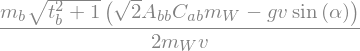

In [47]:
abb = symbols('A_{bb}',real=True)
ghbb = (g[s]/2)*(mb[s]/mW[s])*(-(sin(a)*tb)/sin(atan(tb)) + 
                sqrt(2)*(cab*tb)/(g[s]*sin(atan(tb)))*(mW[s]/mb[s])*(mb[s]/SMvev[s])*abb)
ghbb.simplify()

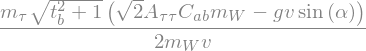

In [48]:
atautau = symbols(r'A_{\tau\tau}',real=True)
ghtautau = (g[s]/2)*(mtau[s]/mW[s])*(-(sin(a)*tb)/sin(atan(tb)) + 
                sqrt(2)*(cab*tb)/(g[s]*sin(atan(tb)))*(mW[s]/mtau[s])*(
                    mtau[s]/SMvev[s])*atautau)
#(g/2) (mtau/mW) ((-Sin[a]*tb/Sin[ArcTan[tb]]) + (Sqrt[2] (Cab*tb)/(g*Sin[ArcTan[tb]]) (mW/mtau)*(mtau/vev*Atata)))

ghtautau.simplify()

## Higgs couplings with vector bosons
In the case of $g_{hWW}$ and $g_{hZZ}$ the couplings in the $2HDM$ are given by

$$\mathcal{L}_{hVV} = g m_{V} \sin{(\alpha - \beta)}$$ 

where $V = W,Z$. The corresponding functions in python are given as follow

In [49]:
sab = symbols('S_{ab}',real=True)
ghww =  gw[s]*mW[s]*sab
ghww

In [50]:
ghzz =  gz[s]*mZ[s]*sab
ghzz

### Numeric implementations

In [51]:
num = numeric_substitutions('All')

In [52]:
ghtt_2hdm = lambdify([a,att,cab,tb],ghtt.subs(num),'numpy')
ghtt_2hdm(0.1,0.2,0.3,0.4)

In [53]:
ghbb_2hdm = lambdify([a,abb,cab,tb],ghbb.subs(num),'numpy')
ghbb_2hdm(0.1,0.2,0.3,0.4)

In [54]:
ghtautau_2hdm = lambdify([a,atautau,cab,tb],ghtautau.subs(num),'numpy')
ghtautau_2hdm(0.1,0.2,0.3,0.4)

In [55]:
ghww_2hdm = lambdify([sab],ghww.subs(num),'numpy')
ghww_2hdm(0.1)

In [56]:
ghzz_2hdm = lambdify([sab],ghzz.subs(num),'numpy')
ghzz_2hdm(0.1)

In [57]:
Rb.func(ghtt,ghbb).subs(numeric_substitutions('All')
            ).subs(a,acos(cab)+atan(tb)).subs({att:1,abb:0.5,cab:0.2,tb:0.2}
                                             ).n()

In [58]:
Rtau.func(ghtt,ghbb,ghtautau).subs(numeric_substitutions('All')
            ).subs(a,acos(cab)+atan(tb)).subs(
    {atautau:1,att:1,abb:0.5,cab:0.2,tb:0.2}).n()

In [59]:
Rw.func(ghtt,ghbb,ghww).subs(numeric_substitutions('All')
            ).subs({a:acos(cab)+atan(tb),sab:sqrt(1-cab**2)}).subs({att:1,abb:0.5,cab:0.2,tb:0.2}
                                             ).n()

In [60]:
Rz.func(ghtt,ghbb,ghzz).subs(numeric_substitutions('All')
            ).subs({a:acos(cab)+atan(tb),sab:sqrt(1-cab**2)}).subs({att:1,abb:0.5,cab:0.2,tb:0.2}
                                             ).n()

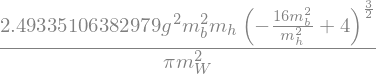

In [61]:
v = 'symbol'
BRbbSM = BRhfifj(g[v]*mb[v]/(2*mW[v]), 3, mb[v], mb[v])
BRbbSM

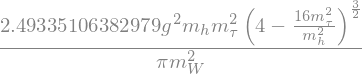

In [62]:
BRtautauSM = BRhfifj(g[v]*mtau[v]/(2*mW[v]), 3, mtau[v], mtau[v])
BRtautauSM

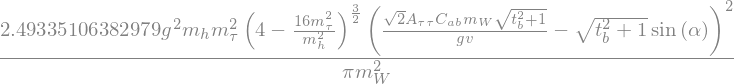

In [63]:
BRtautau2HDM = BRhfifj(ghtautau, 3, mtau[v], mtau[v])#.subs(numeric_substitutions('All')
            #).subs(a,acos(cab)+atan(tb)).subs(
    #{atautau:1,att:1,abb:1,cab:0.2,tb:0.2}).n()
BRtautau2HDM

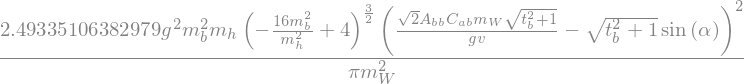

In [64]:
BRbb2HDM = BRhfifj(ghbb, 3, mb[v], mb[v])#.subs(numeric_substitutions('All')
            #).subs(a,acos(cab)+atan(tb)).subs(
    #{atautau:1,att:1,abb:1,cab:0.2,tb:0.2}).n()
BRbb2HDM

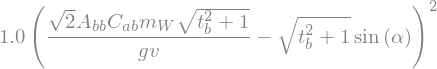

In [65]:
BRbb2HDM/BRbbSM

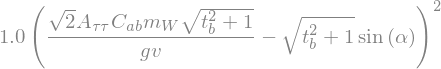

In [66]:
BRtautau2HDM/BRtautauSM

## Initial parameter space

In [67]:
n = 100_000
Cab = np.random.uniform(-1.0,1.0,n)
Tb = np.random.uniform(0.01,50.0,n)
Att = np.random.uniform(0.01,1,n)
Abb = np.random.uniform(0.01,1,n)
parameters = {'Cab':Cab,'tb':Tb,'Att':Att,'Abb':Abb}

In [68]:
THDM = HiggsSignalStrength()
THDM.model = '2HDM-FCNC'
THDM.ghtt = ghtt_2hdm(np.arccos(Cab) + np.arctan(Tb),Att,Cab,Tb)
THDM.ghbb = ghbb_2hdm(np.arccos(Cab) + np.arctan(Tb),Abb,Cab,Tb)
THDM.ghtautau = ghtautau_2hdm(np.arccos(Cab) + np.arctan(Tb),1,Cab,Tb)
THDM.ghWW = ghww_2hdm(np.sqrt(1-Cab**2))
THDM.ghZZ = ghzz_2hdm(np.sqrt(1-Cab**2))
#THDM.gCH = 0.5
#THDM.mCH = np.random.uniform(100,1000,n)

In [69]:
THDM.ghbb=0

In [70]:
THDM

2HDM-FCNC couplings
           ghtt  ghbb  ghtautau       ghWW       ghZZ
0     -0.252842     0  0.077869  31.056268  39.970137
1     -0.502798     0  0.004788  47.961162  61.727127
2     -0.704376     0 -0.005579  51.445360  66.211371
3     -0.219038     0 -0.060061   8.801148  11.327282
4     -0.002579     0  0.052596  22.306657  28.709185
...         ...   ...       ...        ...        ...
99995 -0.613440     0 -0.062214  22.507493  28.967666
99996 -0.683577     0 -0.012289  50.127822  64.515670
99997 -0.683825     0 -0.038943  47.254818  60.818047
99998 -0.745048     0 -0.019311  50.648326  65.185571
99999 -0.649872     0 -0.000962  48.063279  61.858554

[100000 rows x 5 columns]

In [71]:
THDMspace1 = THDM.parameter_space(parameters,sigma=1)
THDMspace2 = THDM.parameter_space(parameters,sigma=2)

## Allowed parameter space

We calculate the allowed parameter space to each signal

### $$R_{\tau}$$

In [72]:
latex_names = {'Cab':r'$\cos(\alpha-\beta)$','tb':r'$\tan(\beta)$'}

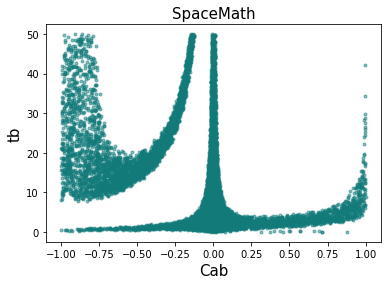

In [73]:
plot_df(THDMspace2['Rtau'],
        colx='Cab',
        coly='tb',
        #fname='rtau_space.png'
       )

### $$R_{b}$$

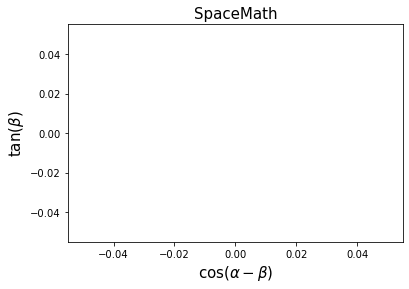

In [74]:
plot_df(THDMspace2['Rb'],colx='Cab',coly='tb',latex_names=latex_names)

### $$R_{\gamma}$$

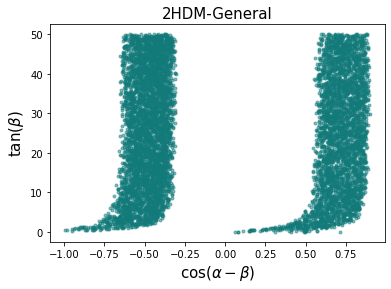

In [75]:
plot_df(THDMspace2['Rgamma'],colx='Cab',coly='tb',
        latex_names=latex_names,
       title='2HDM-General')

### $$R_{W}$$

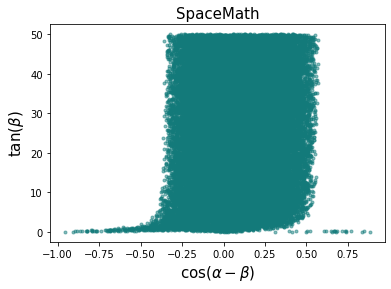

In [76]:
plot_df(THDMspace2['Rw'],colx='Cab',coly='tb',
        latex_names=latex_names)

### $$R_{Z}$$

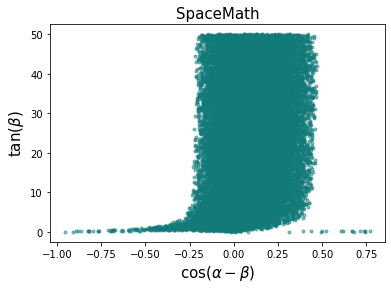

In [77]:
plot_df(THDMspace2['Rz'],colx='Cab',coly='tb',
        latex_names=latex_names)

## Intersection

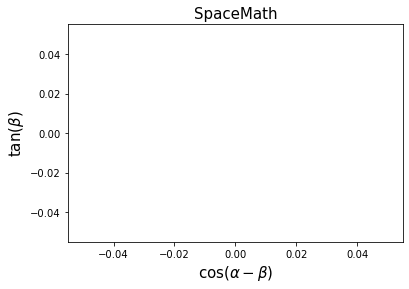

In [78]:
plot_df(THDMspace2['Intersection'],colx='Cab',coly='tb',
        latex_names=latex_names)

## All Rxs
Using directly matplotlib

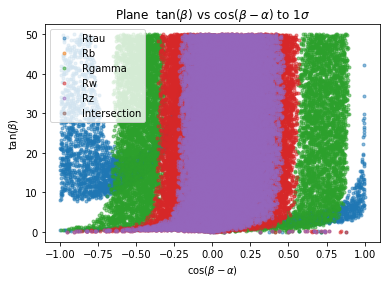

In [79]:
signals = ['Rtau','Rb','Rgamma','Rw','Rz','Intersection']
signalsV = ['Rw','Rz','Rgamma']
data2s = {signal:THDMspace2[signal] for signal in signals}
plt.figure()
for k in data2s.keys():
    plt.plot(data2s[k]['Cab'],data2s[k]['tb'],'.',label=k,alpha=0.5)
plt.xlabel(r'$\cos(\beta-\alpha)$');
plt.ylabel(r'$\tan(\beta)$');
plt.title(r'Plane  $\tan(\beta)$ vs $\cos(\beta -\alpha)$ to 1$\sigma$')
plt.legend();

In [80]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

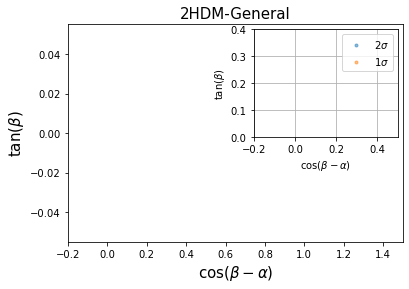

In [81]:
sigmaspace = {r'2$\sigma$':THDMspace2,r'1$\sigma$':THDMspace1}

fig, ax = plt.subplots(1, 1, figsize=[6, 4])
for sigma in sigmaspace.keys():
    ax.plot(sigmaspace[sigma]['Intersection']['Cab'],
        sigmaspace[sigma]['Intersection']['tb'],'.',
             label=sigma,alpha=0.5)
ax.set_xlim(xmax=1.5,xmin=-0.2)
#ax.grid()
ax.set_xlabel(r'$\cos(\beta -\alpha)$',fontsize=15);
ax.set_ylabel(r'$\tan(\beta)$',fontsize=15);
ax.set_title(r'2HDM-General',fontsize=15)
ax.legend();


# Create inset of width 2 inches and height 1.5 inches
# at the default upper right location
axins = inset_axes(ax, width=2, height=1.5)
for sigma in sigmaspace.keys():
    axins.plot(sigmaspace[sigma]['Intersection']['Cab'],
        sigmaspace[sigma]['Intersection']['tb'],'.',
             label=sigma,alpha=0.5)
axins.set_ylim(ymax=0.4,ymin=0)
axins.set_xlim(xmax=0.5,xmin=-0.2)
axins.grid()
axins.set_xlabel(r'$\cos(\beta -\alpha)$');
axins.set_ylabel(r'$\tan(\beta)$');
#ax.title(r'Plane  $\tan(\beta)$ vs $\cos(\alpha -\beta)$')
axins.legend();
#path = ''
#plt.savefig(path + 'name.pdf')
#plt.show()